<a href="https://colab.research.google.com/github/rivandimuhammads/MachineLearning/blob/main/Tugas_2101192049.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [98]:
ls

 dataset_leaf/            Untitled0.ipynb   Untitled3.ipynb
'Klasifikasi MNIST'       Untitled1.ipynb
 Tugas_2101192049.ipynb   Untitled2.ipynb


In [113]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [114]:

# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset_leaf")
data = []
labels = []

[INFO] loading images...


In [115]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [116]:
print(labels)

['dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'dataset_leaf', 'datase

In [117]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [118]:
print(labels)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [119]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [120]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [121]:
model = Sequential()
model.add(Conv2D(16,(3,3), padding="same", input_shape=(64,64,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
activation_16 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 32)       

model.summary()

In [122]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="binary_crossentropy", optimizer=opt,	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

[INFO] training network...
Epoch 1/50
14/14 [==============================] - 2s 125ms/step - loss: 0.1938 - accuracy: 0.9429 - val_loss: 6.1206e-06 - val_accuracy: 1.0000
Epoch 2/50
14/14 [==============================] - 2s 116ms/step - loss: 6.6836e-07 - accuracy: 1.0000 - val_loss: 5.0894e-12 - val_accuracy: 1.0000
Epoch 3/50
14/14 [==============================] - 2s 117ms/step - loss: 8.6951e-13 - accuracy: 1.0000 - val_loss: 2.6401e-14 - val_accuracy: 1.0000
Epoch 4/50
14/14 [==============================] - 2s 115ms/step - loss: 1.1997e-14 - accuracy: 1.0000 - val_loss: 5.6620e-15 - val_accuracy: 1.0000
Epoch 5/50
14/14 [==============================] - 2s 115ms/step - loss: 4.5791e-15 - accuracy: 1.0000 - val_loss: 3.7597e-15 - val_accuracy: 1.0000
Epoch 6/50
14/14 [==============================] - 2s 117ms/step - loss: 3.4598e-15 - accuracy: 1.0000 - val_loss: 3.3865e-15 - val_accuracy: 1.0000
Epoch 7/50
14/14 [==============================] - 2s 115ms/step - loss: 3.2

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


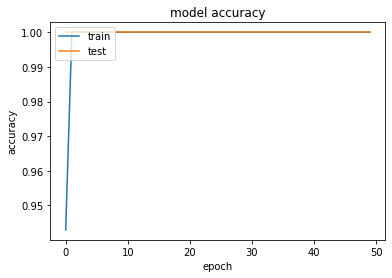

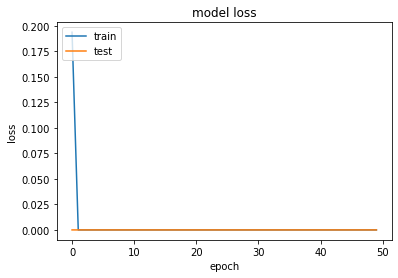

In [123]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [124]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

dataset_leaf       1.00      1.00      1.00       146

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

